# Sentiment Analysis of Financial News Headlines
## This task tests your ability to apply NLP techniques you've learnt to classify a news headline containing financial information into either one of the sentiments (Positive, Negative or Neutral)

### Dataset:
https://raw.githubusercontent.com/subashgandyer/datasets/main/financial_news_headlines_sentiment.csv

## Max Marks without Bonus attempted: 80 points
## Max Marks with Bonus: 100 points
- ### Bonus: 20 points

### Steps
- 1. Download the dataset
- 2. Load the dataset
- 3. Explore the dataset (Exploratory Data Analysis)
- 4. Clean the data
- 5. Apply SMOTE for imbalanced data [Optional] --> Carries Bonus Marks
- 6. Build a BoW model
- 7. Build a Tf-Idf model
- 8. Split train and test data
- 9. Use one ML Classifying algorithm to classify the finanical news headline data
- 10. Use another ML classifying algorithm to classify them
- 11. Plot Confusion matrix

## 1. Download the dataset [1 point]

## 2. Load the dataset [1 point]

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/subashgandyer/datasets/main/financial_news_headlines_sentiment.csv"
df = pd.read_csv(url, encoding='latin1', header=None, names=['sentiment', 'headline'])

df.head()

,sentiment,headline
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


## 3. Explore the dataset [10 points]

In [20]:
print("Exploring Data:")
print(df.head())
print(df.info())
print(df['sentiment'].value_counts())

Exploring Data:
  sentiment                                           headline  \
0   neutral  According to Gran , the company has no plans t...   
1   neutral  Technopolis plans to develop in stages an area...   
2  negative  The international electronic industry company ...   
3  positive  With the new production plant the company woul...   
4  positive  According to the company 's updated strategy f...   

                                      headline_clean  
0  according to gran  the company has no plans to...  
1  technopolis plans to develop in stages an area...  
2  the international electronic industry company ...  
3  with the new production plant the company woul...  
4  according to the company s updated strategy fo...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   sentiment       4846 non-null   object
 1   headline      

## 4. Clean the data [5 points]

In [3]:
import re
import string

def clean_text(text):
    text = text.lower()  # Converting text to lowercase
    text = re.sub('\[.*?\]', '', text)  # Removing text in square brackets
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # Removing punctuation
    text = re.sub('\w*\d\w*', '', text)  # Removing words containing numbers
    return text

df['headline_clean'] = df['headline'].apply(lambda x: clean_text(x))

## 5. SMOTE (Imbalanced dataset) [OPTIONAL] BONUS [20 points]
Hint: Use **imblearn** library

In [4]:
!pip uninstall -y imbalanced-learn
!pip install imbalanced-learn

Found existing installation: imbalanced-learn 0.10.1
Uninstalling imbalanced-learn-0.10.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/imbalanced_learn-0.10.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/imblearn/*
Proceed (Y/n)? y
  Successfully uninstalled imbalanced-learn-0.10.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 2.2 MB/s eta 0:00:00


In [13]:
from imblearn.over_sampling import SMOTE


#applying SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_bow, df['sentiment'])

# Split the balanced data into training and testing sets
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

#### (both the imbalanced dataset and the balanced dataset has been used for the next steps.)

## 6. BoW model [15 points]

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(df['headline_clean'])

## 7. Tf-idf model [15 points]

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['headline_clean'])

## 8. Split train test data [3 points]

In [11]:
from sklearn.model_selection import train_test_split

X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow, df['sentiment'], test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(X_tfidf, df['sentiment'], test_size=0.2, random_state=42)

## 9. Classification Algorithm [10 points]
- Train
- Predict

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_bow, y_train)
y_pred_nb_bow = nb_classifier.predict(X_test_bow)

print("Naive Bayes Classifier with BoW:")
print(classification_report(y_test, y_pred_nb_bow))




#smote:
nb_classifier_smote = MultinomialNB()
nb_classifier_smote.fit(X_train_smote, y_train_smote)
y_pred_nb_smote = nb_classifier_smote.predict(X_test_smote)

print("Naive Bayes Classifier with BoW (SMOTE):")
print(classification_report(y_test_smote, y_pred_nb_smote))

Naive Bayes Classifier with BoW:
              precision    recall  f1-score   support

    negative       0.76      0.53      0.62       110
     neutral       0.79      0.87      0.82       571
    positive       0.68      0.62      0.65       289

    accuracy                           0.75       970
   macro avg       0.74      0.67      0.70       970
weighted avg       0.75      0.75      0.75       970

Naive Bayes Classifier with BoW (SMOTE):
              precision    recall  f1-score   support

    negative       0.66      0.82      0.73       564
     neutral       0.69      0.80      0.74       580
    positive       0.66      0.40      0.50       584

    accuracy                           0.67      1728
   macro avg       0.67      0.67      0.66      1728
weighted avg       0.67      0.67      0.66      1728



## 10. Another Classification Algorithm [10 points]
- Train
- Predict

In [16]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train_tfidf, y_train)
y_pred_lr_tfidf = lr_classifier.predict(X_test_tfidf)

print("Logistic Regression Classifier with Tf-idf:")
print(classification_report(y_test, y_pred_lr_tfidf))


lr_classifier_smote = LogisticRegression(max_iter=1000)
lr_classifier_smote.fit(X_train_smote, y_train_smote)
y_pred_lr_smote = lr_classifier_smote.predict(X_test_smote)

print("Logistic Regression Classifier with Tf-idf (SMOTE):")
print(classification_report(y_test_smote, y_pred_lr_smote))

Logistic Regression Classifier with Tf-idf:
              precision    recall  f1-score   support

    negative       0.92      0.50      0.65       110
     neutral       0.74      0.96      0.83       571
    positive       0.82      0.48      0.61       289

    accuracy                           0.76       970
   macro avg       0.82      0.65      0.70       970
weighted avg       0.78      0.76      0.75       970

Logistic Regression Classifier with Tf-idf (SMOTE):
              precision    recall  f1-score   support

    negative       0.73      0.87      0.80       564
     neutral       0.81      0.77      0.79       580
    positive       0.73      0.63      0.68       584

    accuracy                           0.76      1728
   macro avg       0.76      0.76      0.75      1728
weighted avg       0.76      0.76      0.75      1728



## 11. Confusion Matrixes for two classification algorithms and two feature extractor methods [10 points]

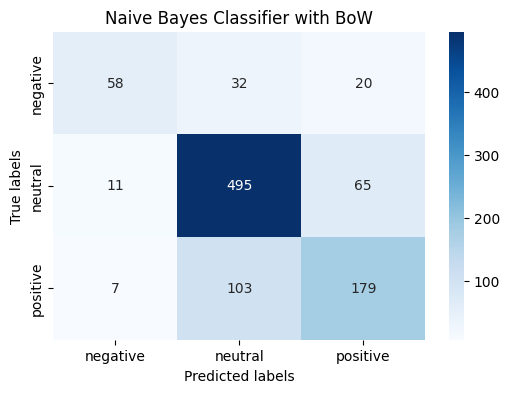

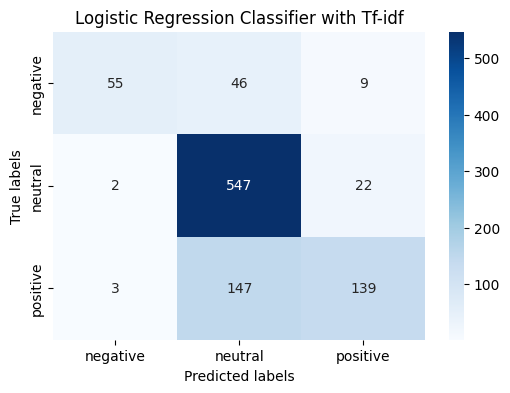

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred_nb_bow, "Naive Bayes Classifier with BoW")
plot_confusion_matrix(y_test, y_pred_lr_tfidf, "Logistic Regression Classifier with Tf-idf")

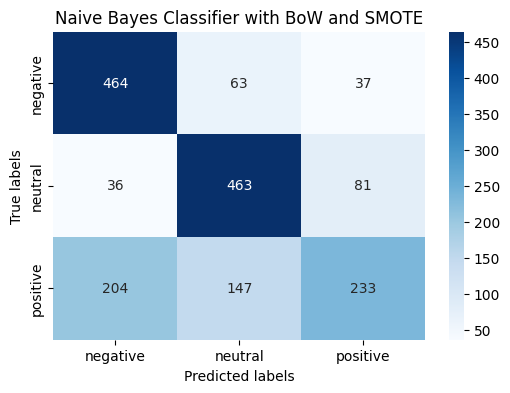

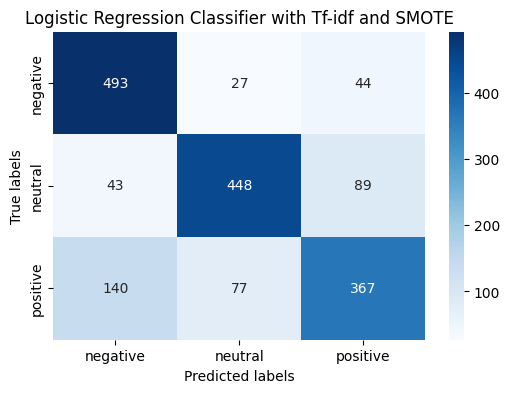

In [19]:
#Confusion matrices for SMOTE data
plot_confusion_matrix(y_test_smote, y_pred_nb_smote, "Naive Bayes Classifier with BoW and SMOTE")
plot_confusion_matrix(y_test_smote, y_pred_lr_smote, "Logistic Regression Classifier with Tf-idf and SMOTE")